In [1]:
import os, sys

# setting the utilities required for loading the data and training the model
# parent_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..')) + '/utilities/'
sys.path.append('utilities/')
from modelTrainingUtility import *
from modelZoo import cnn_best2
import pandas as pd

import sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split

2022-10-20 13:58:58.956194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# input parameters
input_params = {
    "input_path": 'tmp/train.npz', # path to the training dataset
    "output_path": 'model/experiment-q/', #path to save results of trained model with convergence curves
    "verbose": True,
    "target_byte": 0,
    "network_type": "cnn2", # choices={'mlp', 'cnn', 'cnn2', 'wang'}
    "start_idx": 1200,
    "end_idx": 2200
}

if not os.path.isdir(input_params["output_path"]):
    print('creating directory for saving results ...')
    os.makedirs(input_params["output_path"])
else:
    print('directory available for saving results.')

directory available for saving results.


In [3]:
# directory for saving model
model_dir = os.path.join(input_params["output_path"], 'model')
if not os.path.isdir(model_dir):
    print('creating directory for saving model ...')
    os.makedirs(model_dir)
else:
    print('directory already available for saving model.')

directory already available for saving model.


In [4]:
dataset_name = os.path.basename(os.path.dirname(input_params["input_path"]))
target_byte = input_params["target_byte"]
model_save_path = os.path.join(model_dir, 'best_model_{}_dataset_{}_targetbyte_{}.hdf5'.format(input_params["network_type"], dataset_name, input_params["target_byte"]))


In [5]:
# setting model parameters
epochs = 300
batch_size = 100
input_shape = (input_params["end_idx"] - input_params["start_idx"], 1)

In [6]:

# load the power traces
X_profiling, y_profiling, key = load_training_data_2(input_params)
print('shape of input: ', X_profiling.shape)
print('shape of labels:', y_profiling.shape)
print('key used for training: ', key)

loading data for training model ...
processing data for key byte 0
training data loaded successfully!
shape of input:  (18000, 1000)
shape of labels: (18000,)
key used for training:  [132 100  30 248 236 241 103 201 216   5 118  24 128  81  15 192]


In [7]:
best_model = cnn_best2(input_shape)

2022-10-20 13:59:01.990428: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-20 13:59:01.990868: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-20 13:59:02.041273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 13:59:02.041907: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: TITAN RTX computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-10-20 13:59:02.041923: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-20 13:59:02.043035: I tensorflow/stream_executor/platform/default/dso_load

In [8]:
model_save_path='m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5'
history = train_model(X_profiling, y_profiling, best_model, model_save_path, epochs, batch_size, input_params["verbose"])


reshaping the data for training CNN ...
shape of the training dataset:  (18000, 1000, 1)
Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-10-20 13:59:02.746682: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-20 13:59:02.747310: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz
2022-10-20 13:59:03.241685: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-10-20 13:59:03.357923: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-20 13:59:03.897515: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-20 13:59:03.922944: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


161/162 [============================>.] - ETA: 0s - loss: 5.5452 - accuracy: 0.0023WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9821ef4170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
162/162 [==============================] - 8s 28ms/step - loss: 5.5452 - accuracy: 0.0023 - val_loss: 5.5452 - val_accuracy: 0.0050

Epoch 00001:

Epoch 32/300
162/162 [==============================] - 4s 27ms/step - loss: 5.5263 - accuracy: 0.0060 - val_loss: 5.5648 - val_accuracy: 0.0044

Epoch 00032: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 33/300
162/162 [==============================] - 4s 27ms/step - loss: 5.5266 - accuracy: 0.0054 - val_loss: 5.5668 - val_accuracy: 0.0033

Epoch 00033: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 34/300
162/162 [==============================] - 4s 27ms/step - loss: 5.5252 - accuracy: 0.0066 - val_loss: 5.5674 - val_accuracy: 0.0039

Epoch 00034: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 35/300
162/162 [==============================] - 4s 27ms/step - loss: 5.5243 - accuracy: 0.0063 - val_loss: 5.5676 - val_accuracy: 0.0039

Epoch 00035: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 36/300
162/162 [==============================] - 4s 27ms/

162/162 [==============================] - 4s 27ms/step - loss: 5.5008 - accuracy: 0.0069 - val_loss: 5.5833 - val_accuracy: 0.0033

Epoch 00067: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 68/300
162/162 [==============================] - 4s 27ms/step - loss: 5.5006 - accuracy: 0.0088 - val_loss: 5.5882 - val_accuracy: 0.0044

Epoch 00068: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 69/300
162/162 [==============================] - 4s 27ms/step - loss: 5.4998 - accuracy: 0.0076 - val_loss: 5.5820 - val_accuracy: 0.0044

Epoch 00069: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 70/300
162/162 [==============================] - 4s 27ms/step - loss: 5.5010 - accuracy: 0.0079 - val_loss: 5.5819 - val_accuracy: 0.0033

Epoch 00070: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 71/300
162/162 [==============================] - 4s 27ms/step - loss: 

162/162 [==============================] - 4s 27ms/step - loss: 5.3171 - accuracy: 0.0199 - val_loss: 5.7323 - val_accuracy: 0.0044

Epoch 00102: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 103/300
162/162 [==============================] - 4s 27ms/step - loss: 5.3060 - accuracy: 0.0193 - val_loss: 5.7423 - val_accuracy: 0.0017

Epoch 00103: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 104/300
162/162 [==============================] - 4s 27ms/step - loss: 5.2941 - accuracy: 0.0188 - val_loss: 5.7454 - val_accuracy: 0.0022

Epoch 00104: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 105/300
162/162 [==============================] - 4s 27ms/step - loss: 5.2945 - accuracy: 0.0200 - val_loss: 5.7557 - val_accuracy: 0.0028

Epoch 00105: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 106/300
162/162 [==============================] - 4s 27ms/step - lo

Epoch 137/300
162/162 [==============================] - 4s 27ms/step - loss: 4.7279 - accuracy: 0.0604 - val_loss: 6.4026 - val_accuracy: 0.0033

Epoch 00137: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 138/300
162/162 [==============================] - 4s 27ms/step - loss: 4.7028 - accuracy: 0.0643 - val_loss: 6.4579 - val_accuracy: 0.0039

Epoch 00138: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 139/300
162/162 [==============================] - 4s 27ms/step - loss: 4.6637 - accuracy: 0.0720 - val_loss: 6.4944 - val_accuracy: 0.0039

Epoch 00139: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 140/300
162/162 [==============================] - 4s 27ms/step - loss: 4.6449 - accuracy: 0.0763 - val_loss: 6.5352 - val_accuracy: 0.0017

Epoch 00140: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 141/300
162/162 [==============================] - 4s 

Epoch 172/300
162/162 [==============================] - 4s 27ms/step - loss: 3.6285 - accuracy: 0.2047 - val_loss: 8.2173 - val_accuracy: 0.0028

Epoch 00172: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 173/300
162/162 [==============================] - 4s 27ms/step - loss: 3.5742 - accuracy: 0.2118 - val_loss: 8.2835 - val_accuracy: 0.0033

Epoch 00173: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 174/300
162/162 [==============================] - 4s 27ms/step - loss: 3.5214 - accuracy: 0.2114 - val_loss: 8.3629 - val_accuracy: 0.0017

Epoch 00174: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 175/300
162/162 [==============================] - 4s 27ms/step - loss: 3.5160 - accuracy: 0.2164 - val_loss: 8.4558 - val_accuracy: 0.0017

Epoch 00175: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 176/300
162/162 [==============================] - 4s 

Epoch 207/300
162/162 [==============================] - 4s 27ms/step - loss: 2.2175 - accuracy: 0.4662 - val_loss: 11.5043 - val_accuracy: 0.0022

Epoch 00207: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 208/300
162/162 [==============================] - 4s 27ms/step - loss: 2.2319 - accuracy: 0.4616 - val_loss: 11.5937 - val_accuracy: 0.0033

Epoch 00208: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 209/300
162/162 [==============================] - 4s 27ms/step - loss: 2.1617 - accuracy: 0.4732 - val_loss: 11.6926 - val_accuracy: 0.0050

Epoch 00209: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 210/300
162/162 [==============================] - 4s 27ms/step - loss: 2.1183 - accuracy: 0.4773 - val_loss: 11.7521 - val_accuracy: 0.0017

Epoch 00210: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 211/300
162/162 [==============================] -

Epoch 242/300
162/162 [==============================] - 4s 27ms/step - loss: 1.0921 - accuracy: 0.7215 - val_loss: 16.1831 - val_accuracy: 0.0017

Epoch 00242: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 243/300
162/162 [==============================] - 4s 27ms/step - loss: 1.0619 - accuracy: 0.7306 - val_loss: 16.3022 - val_accuracy: 0.0044

Epoch 00243: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 244/300
162/162 [==============================] - 4s 27ms/step - loss: 1.0268 - accuracy: 0.7369 - val_loss: 16.3882 - val_accuracy: 0.0033

Epoch 00244: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 245/300
162/162 [==============================] - 4s 27ms/step - loss: 1.0222 - accuracy: 0.7397 - val_loss: 16.4724 - val_accuracy: 0.0028

Epoch 00245: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 246/300
162/162 [==============================] -

Epoch 277/300
162/162 [==============================] - 4s 27ms/step - loss: 0.4881 - accuracy: 0.8763 - val_loss: 21.2038 - val_accuracy: 0.0033

Epoch 00277: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 278/300
162/162 [==============================] - 4s 27ms/step - loss: 0.4567 - accuracy: 0.8834 - val_loss: 21.1741 - val_accuracy: 0.0033

Epoch 00278: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 279/300
162/162 [==============================] - 4s 27ms/step - loss: 0.4685 - accuracy: 0.8811 - val_loss: 21.3132 - val_accuracy: 0.0022

Epoch 00279: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 280/300
162/162 [==============================] - 4s 27ms/step - loss: 0.4587 - accuracy: 0.8822 - val_loss: 21.4788 - val_accuracy: 0.0039

Epoch 00280: saving model to m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5
Epoch 281/300
162/162 [==============================] -

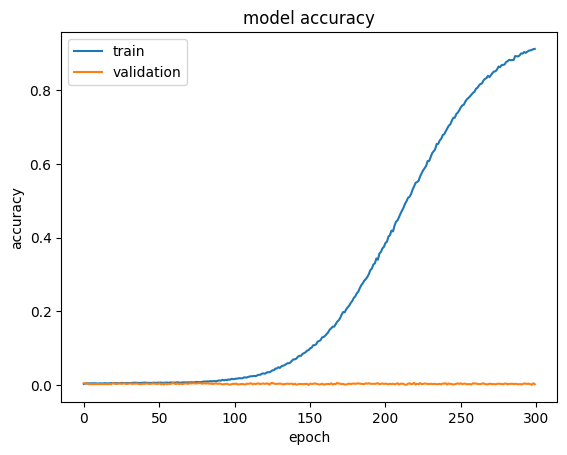

In [9]:
# summarize history for accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')




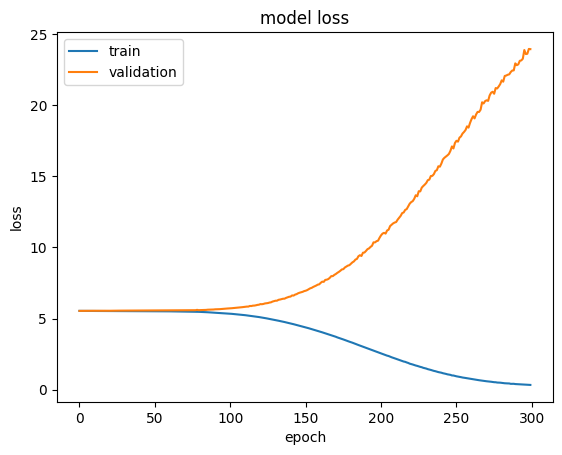

In [10]:

# summarize history for loss
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


In [ ]:
os.remove("tmp/train.npz")